In [119]:
library(tidyverse)
library(dslabs)
library(ggthemes)
library(titanic)

Warning message:
"package 'titanic' was built under R version 3.6.3"

Used to compare the position or performance of multiple items with respect to each other. Actual values matters somewhat less than the ranking.

# Ordered bar chart

Average GDP of continents in 2010

`summarise()` ungrouping output (override with `.groups` argument)


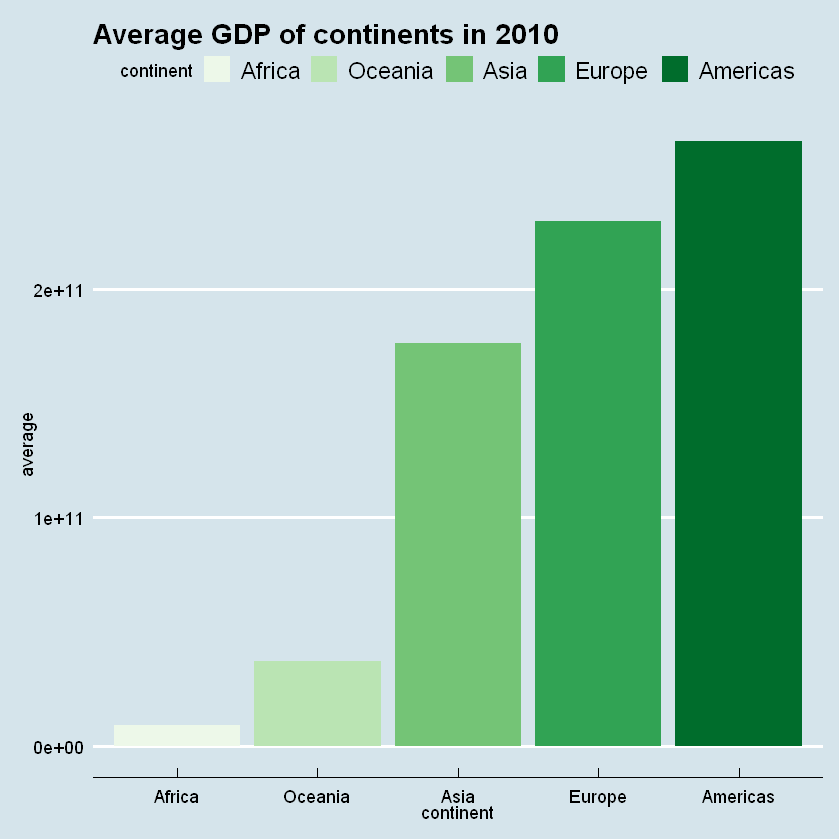

In [34]:
gdp_2010 <- gapminder %>%
group_by(continent) %>%
summarize(average = mean(gdp, na.rm = T)) %>%
mutate(continent = reorder(continent, average)) 

gdp_2010 %>%
ggplot(aes(continent, average, fill = continent, show.legend = F)) +
geom_col() + 
scale_fill_brewer(palette = 'Greens') +
labs('Average GDP', title = 'Average GDP of continents in 2010') +
theme_economist()

# Lolipop chart

Lollipop charts conveys the same information as in bar charts. By reducing the thick bars into thin lines, it reduces the clutter and lays more emphasis on the value. It looks nice and modern.

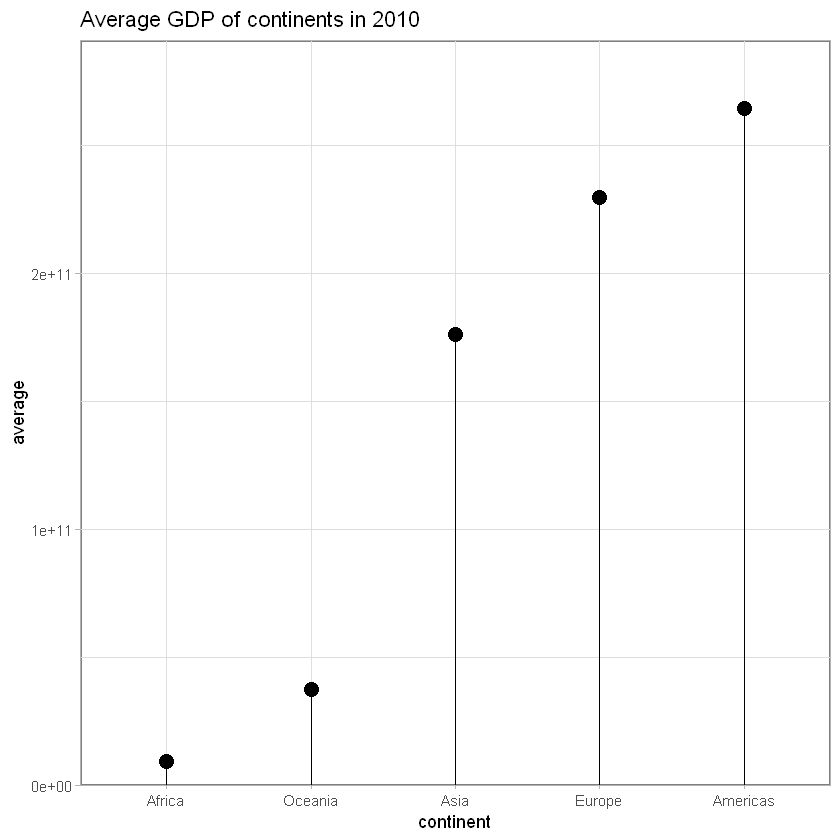

In [76]:
gdp_2010 %>%
ggplot(aes(continent, average)) +
geom_point(size = 4) + 
geom_segment(aes(x = continent, xend = continent, y = 0, yend = average)) +
scale_y_continuous(expand = expansion(mul = c(0, .1))) +
theme_light() +
theme(panel.background = element_rect(color = 'grey50', size = 1)) +
labs(title = 'Average GDP of continents in 2010')

# Dot Plot

Dot plots are very similar to lollipops, but without the line and is flipped to horizontal position. It emphasizes more on the rank ordering of items with respect to actual values and how far apart are the entities with respect to each other.

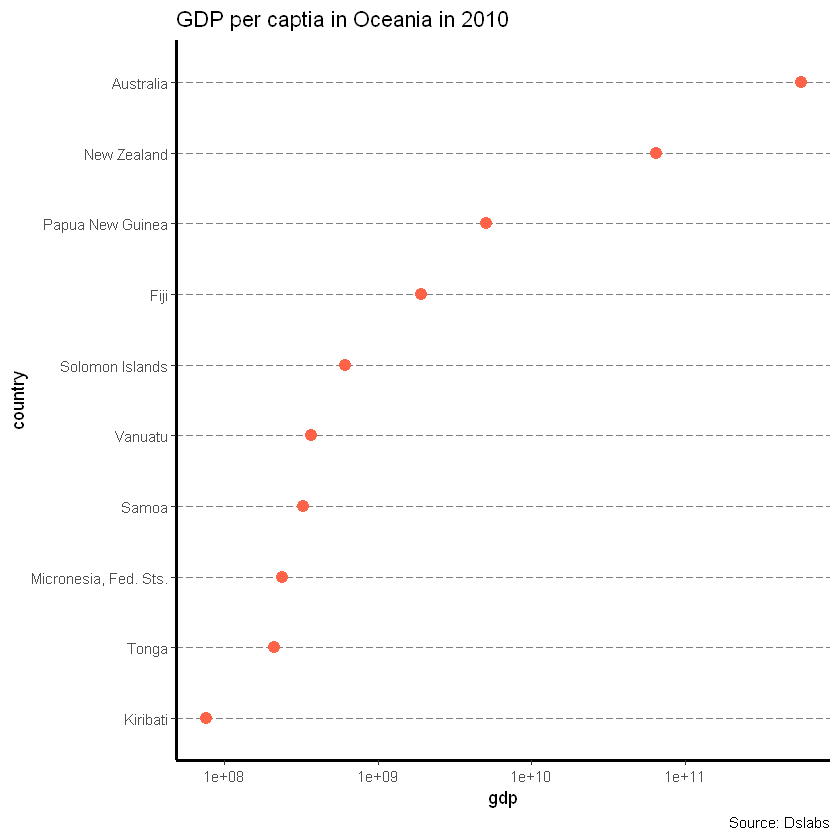

In [77]:
#GDP per capita in Oceania in 2010
gapminder %>%
filter(continent == 'Oceania' & year == 2010 & !is.na(gdp)) %>%
mutate(country = reorder(country, gdp)) %>%
ggplot(aes(country, gdp)) +
geom_point(color = 'tomato', size = 3) +
scale_y_log10() +
coord_flip() +
theme_classic() +
theme(panel.grid.major.y = element_line(linetype = 'longdash', color = 'grey50'),
      axis.line = element_line(size = 1)) +
labs(title = 'GDP per captia in Oceania in 2010', caption = 'Source: Dslabs')

# Slope Chart

Compare Mean GDP per capita between continents in 1980 and 1990

`summarise()` regrouping output by 'continent' (override with `.groups` argument)


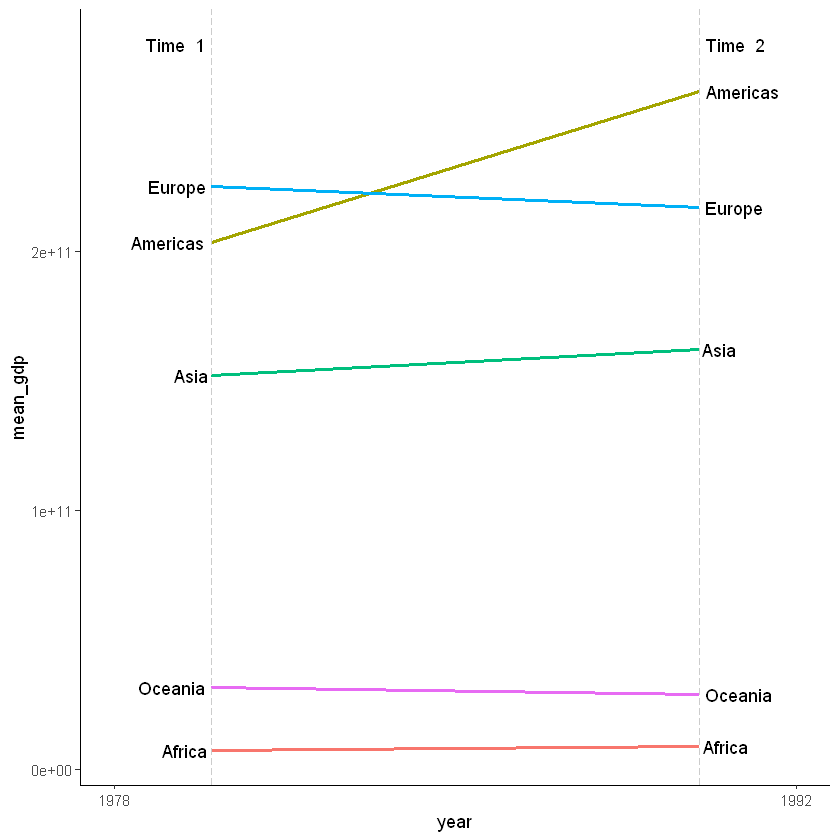

In [118]:
gapminder %>%
filter(year %in% c(1980, 1990) & !is.na(gdp)) %>%
group_by(continent, year) %>%
summarize(mean_gdp = mean(gdp)) %>%
ggplot(aes(year, mean_gdp)) + 
geom_line(aes(color = continent), size = 1, show.legend = F) + 
geom_vline(xintercept = c(1980, 1990), linetype = 'longdash', color = 'grey80') +
scale_x_continuous(breaks = c(1978, 1992), limits = c(1978, 1992)) +
geom_text(aes(year, mean_gdp, label = continent, hjust = ifelse(year == 1980, 1.1, -0.1))) +
annotate(x = c(1980, 1990), y = 2.8e11, label = paste('Time ', 1:2), 
         geom = 'text', hjust = c(1.1, -.1)) +
labs(y = 'Mean GDP') +
theme_classic()

# Dumbbell Plot

Dumbbell charts are a great tool if you wish to:  
* 1. Visualize relative positions (like growth and decline) between two points in time. 
* 2. Compare distance between two categories.

Visualize group difference

In [120]:
head(titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Survival rate of each gender in each Passenger class`

In [123]:
sr <- titanic_train %>%
group_by(Pclass, Sex) %>%
summarize(rate = mean(Survived)) %>%
mutate(Pclass = paste0('Pclass ', Pclass))

sr

`summarise()` regrouping output by 'Pclass' (override with `.groups` argument)


Pclass,Sex,rate
Pclass 1,female,0.9680851
Pclass 1,male,0.3688525
Pclass 2,female,0.9210526
Pclass 2,male,0.1574074
Pclass 3,female,0.5000000
Pclass 3,male,0.1354467


In [137]:
sr %>% spread(Sex, rate)

Pclass,female,male
Pclass 1,0.9680851,0.3688525
Pclass 2,0.9210526,0.1574074
Pclass 3,0.5000000,0.1354467


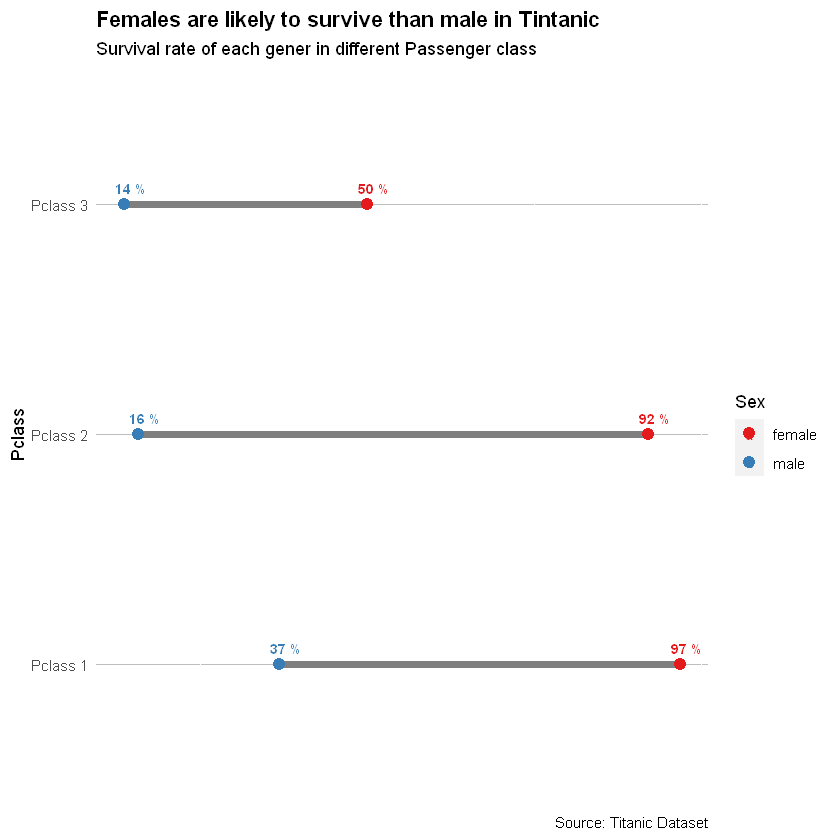

In [183]:
ggplot() +
geom_segment(data = sr %>% spread(Sex, rate),
             mapping = aes(y = Pclass, yend = Pclass, x = female, xend = male),
             size = 2, color = 'grey50') +
geom_point(data = sr, mapping = aes(rate, Pclass, color = Sex), size = 3) +
geom_text(data = sr, 
          mapping = aes(rate, Pclass, 
                        color = Sex,
                        label = paste0(round(rate * 100), ' %')),
          vjust = -1, hjust = .3, 
          size = 3,
          fontface = 'bold') +
scale_color_brewer(palette = 'Set1') +
labs(title = 'Females are likely to survive than male in Tintanic',
     subtitle = 'Survival rate of each gener in different Passenger class',
     caption = 'Source: Titanic Dataset',
     x = NULL) +
theme(axis.ticks = element_blank(),
      axis.text.x = element_blank(),
      panel.background = element_blank(),
      panel.grid.major.y = element_line(color = 'grey'),
      plot.title = element_text(face = 'bold')) 
